# **Practical 1**
**Linear regression by using Deep Neural network:** Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.


### Importing libraries and the dataset


In [284]:
#Importing the pandas for data processing and numpy for numerical computing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [285]:
# Importing the Boston Housing dataset from the sklearn
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset from OpenML
boston = fetch_openml(data_id=531)

In [286]:
# #Converting the data into pandas dataframe
# for online 
data = pd.DataFrame(boston.data)















# #reading from csv
# data  = pd.read_csv('Boston.csv')
# data.head(10)

### First look at the dataset

In [287]:
#First look at the data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [288]:
# for online 
# Adding the feature names to the dataframe
data.columns = boston.feature_names











# #for csv file 
# data.columns = data.columns.str.upper()
# features = ['LSTAT', 'RM', 'PTRATIO']


In [289]:
#Adding the target variable to the dataset
data['PRICE'] = boston.target 

In [290]:
#Looking at the data with names and target variable
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [291]:
#Shape of the data
print(data.shape)

(506, 14)


In [292]:
#Checking the null values in the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No null values in the dataset, no missing value treatement needed

In [293]:
#Checking the statistics of the data
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


<a id = 'visual'></a>
### Visualisation

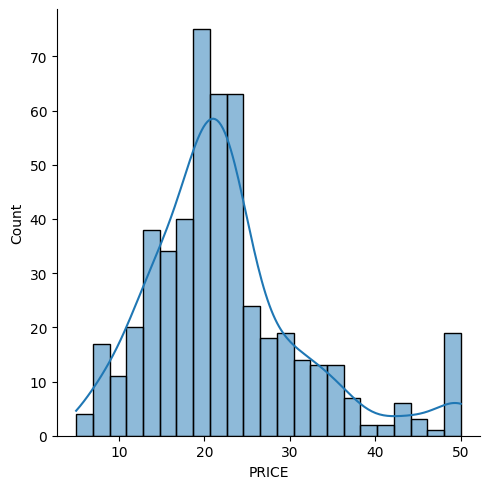

In [295]:
#checking the distribution of the target variable
import seaborn as sns
sns.displot(data['PRICE'], kde=True)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

<Axes: ylabel='PRICE'>

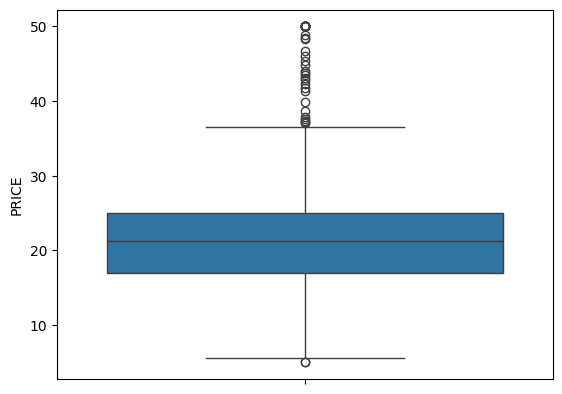

In [296]:
#Distribution using box plot
sns.boxplot(data.PRICE)

<a id = 'corr'></a>
### Checking the correlation of the independent feature with the dependent feature

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.An intelligent correlation analysis can lead to a greater understanding of your data

In [297]:
#checking Correlation of the data 
correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

<Axes: >

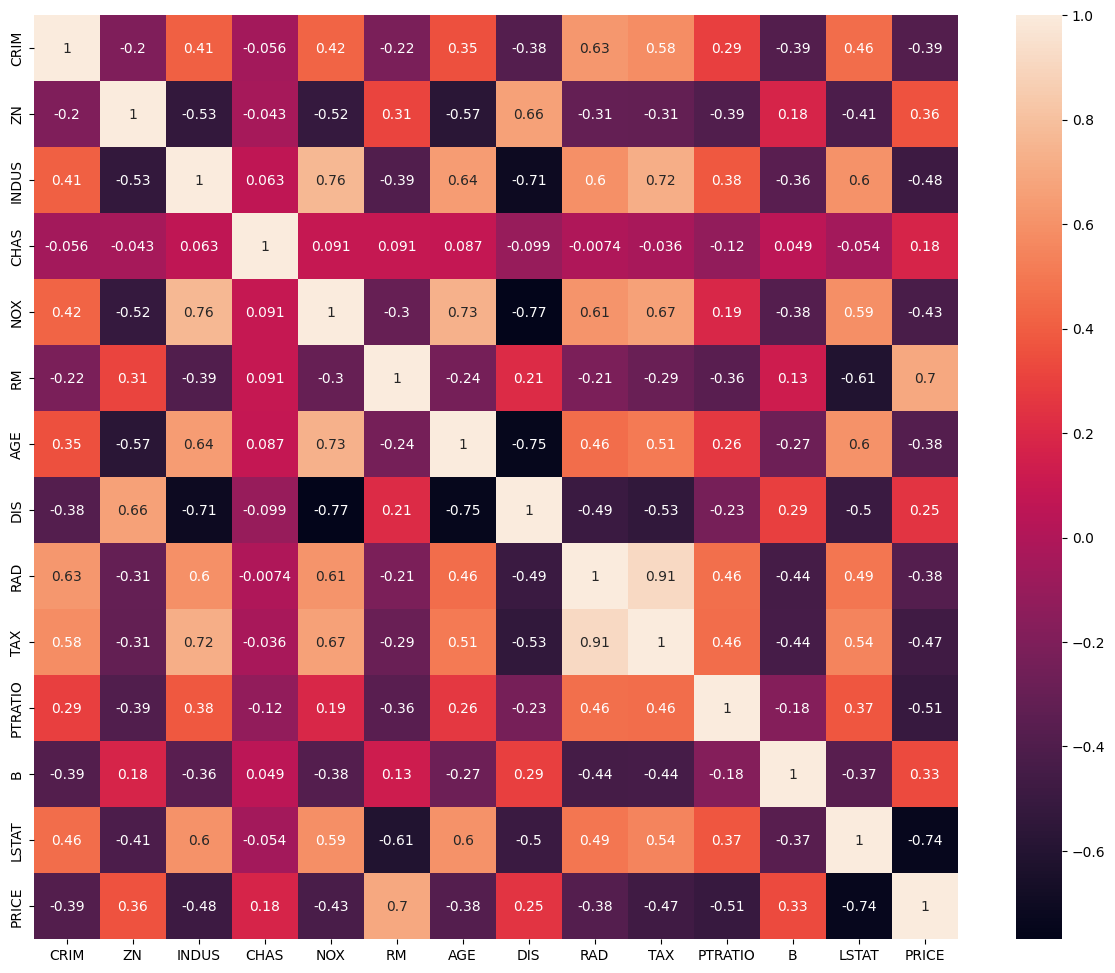

In [298]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

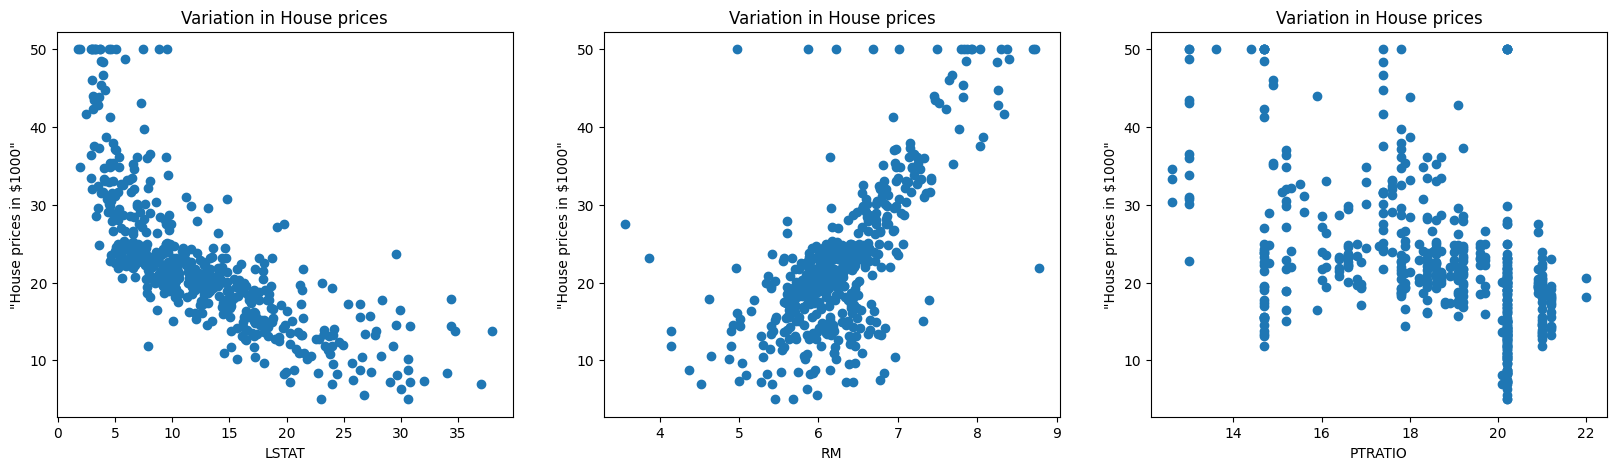

In [299]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [300]:
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]
y= data.PRICE

<a id = 'valid'></a>
### Splitting the data for Model Validation 

In [301]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

<a id = 'build'></a>
### Building the Model 

In [302]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [303]:
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

<a id = 'evaluate'></a>
### Model Evaluation

In [304]:
# Convert X_test to a NumPy array
X_test = np.array(X_test)
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [305]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

5.041784121402056


In [306]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7263451459702503


### Neural Networks

In [307]:
# !pip install tensorflow
# !pip install keras

In [308]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [309]:
# # Select only the first 13 features  for offline 
# # Correct slicing for Pandas DataFrame
# # For Pandas DataFrame
# X_train = X_train.iloc[:, :13]
# # For NumPy array
# X_test = X_test[:, :13]
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
















#for online

# #Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [310]:
results=model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 2ms/step - loss: 568.1149
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 516.0721
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 393.1763
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 176.6980
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 74.1135
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 41.8625
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 29.3023
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 25.0271
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 22.3164
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 20.5785
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 18.9630
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 17.7225
Epoch 13/100
13/13 [=

### Evaluation of the model

In [311]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [312]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8992688787318817


In [313]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.0588945259964424


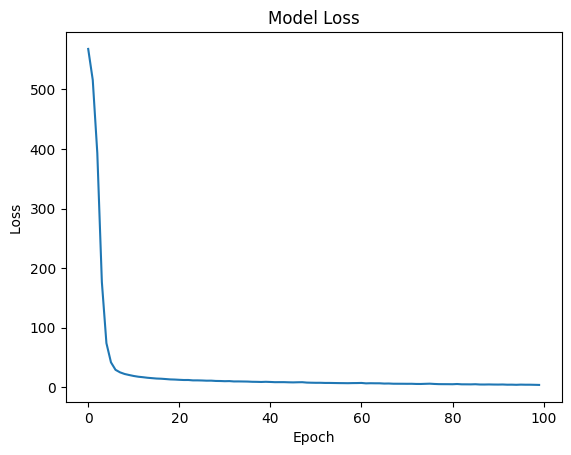

In [314]:
plt.plot(results.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss ')
plt.xlabel('Epoch')
plt.show()

In [315]:
from keras.layers import Dropout
from keras import regularizers


model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(13,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [316]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 2s 65ms/step - loss: -5039.6040 - accuracy: 0.0000e+00 - val_loss: -37950.0312 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 1s 45ms/step - loss: -242973.1250 - accuracy: 0.0000e+00 - val_loss: -943045.5625 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 1s 46ms/step - loss: -2980565.5000 - accuracy: 0.0000e+00 - val_loss: -8838502.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 1s 45ms/step - loss: -20700030.0000 - accuracy: 0.0000e+00 - val_loss: -51229240.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 1s 47ms/step - loss: -99013056.0000 - accuracy: 0.0000e+00 - val_loss: -215588736.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 1s 46ms/step - loss: -369861664.0000 - accuracy: 0.0000e+00 - val_loss: -722233152.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
13

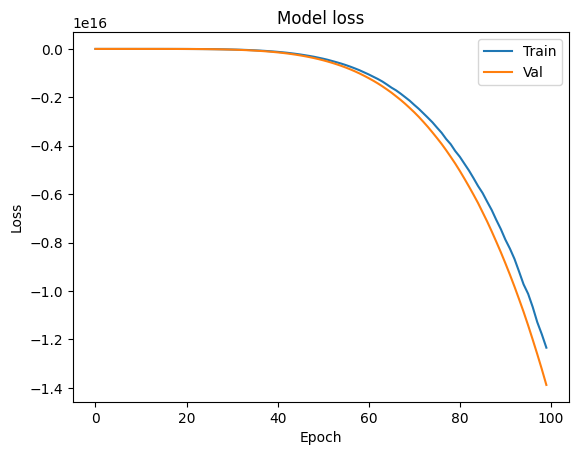

In [317]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [318]:
output = model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 2ms/step - loss: 9.3568


In [319]:
output = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {output}")


4/4 [==============================] - 0s 2ms/step - loss: 9.3568
Mean Squared Error: 9.35683536529541


In [320]:
y_pred = model.predict(x=X_test)


4/4 [==============================] - 0s 2ms/step


In [321]:
print(*zip(y_pred,y_test))

(array([17.194767], dtype=float32), 16.5) (array([23.040026], dtype=float32), 24.8) (array([18.760134], dtype=float32), 17.4) (array([19.358541], dtype=float32), 19.3) (array([42.25747], dtype=float32), 37.6) (array([24.536697], dtype=float32), 24.2) (array([35.89008], dtype=float32), 35.4) (array([18.640549], dtype=float32), 19.9) (array([15.820346], dtype=float32), 27.5) (array([14.730403], dtype=float32), 17.0) (array([26.300592], dtype=float32), 31.2) (array([24.39823], dtype=float32), 24.4) (array([20.171202], dtype=float32), 16.1) (array([39.07452], dtype=float32), 27.0) (array([18.959433], dtype=float32), 21.0) (array([11.002215], dtype=float32), 14.9) (array([18.691858], dtype=float32), 18.9) (array([13.318691], dtype=float32), 6.3) (array([13.344213], dtype=float32), 16.3) (array([13.978604], dtype=float32), 13.9) (array([5.5516915], dtype=float32), 8.8) (array([17.4452], dtype=float32), 19.4) (array([20.058897], dtype=float32), 18.8) (array([21.288582], dtype=float32), 19.8) 